In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import perturbseq as perturb
sc.logging.print_versions()

scanpy==1.5.1 anndata==0.7.1 umap==0.4.4 numpy==1.17.2 scipy==1.4.1 pandas==0.24.2 scikit-learn==0.22 statsmodels==0.11.0 python-igraph==0.7.1 louvain==0.6.1 leidenalg==0.8.1


Annotate perturbations
==

Input:
- scanpy object with gene expression
- cell2guide file: 
    - file annotating which guide is present in each cell. binary with 0 when the guide is absent and 1 if it is present. note that there can be multiples guides per cell. 
    - the rows of this file are the cells, and the columns are 'cell', and the set of guides in the experiments.
- guide2gene file (optional): 
    - file annotating which guides target the same gene.
    - 2 columns of this file must be named 'guide' and 'gene'

In [3]:
datapath='/ahg/regevdata/projects/Cell2CellCommunication/perturbseq_benchmarks/data/2018-11-09'
dataset='dc_3hr'
gsm_number='GSM2396856'
anno=datapath+'/'+dataset+'/'+gsm_number+'_'+dataset+'_cbc_gbc_dict_lenient.csv.gz' #also experiment with the strict
pref=datapath+'/'+dataset+'/'+dataset

expr_file=pref+'raw_counts.h5ad'
cells2guide_file=pref+'.cell2guide.csv.gz'
guide2gene_file=pref+'.guide2gene.csv.gz'

In [6]:
#read in adata
adata=sc.read(expr_file)
adata.var_names_make_unique() 
adata

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


AnnData object with n_obs × n_vars = 32777 × 17775 
    obs: 'batch'

In [7]:
perturb.io.read_perturbations_csv(adata,
                       cell2guide_csv=cells2guide_file,
                      guide2gene_csv=guide2gene_file)
adata

adata cells: 32777
annotated cells: 32777 or 100.0 percent of adata


AnnData object with n_obs × n_vars = 32777 × 17775 
    obs: 'batch', 'perturb.m_Rel_3', 'perturb.m_Spi1_3', 'perturb.m_Nfkb1_4', 'perturb.m_Irf4_4', 'perturb.m_Nfkb1_3', 'perturb.m_Irf4_2', 'perturb.m_Stat3_3', 'perturb.m_Irf2_1', 'perturb.m_E2f4_2', 'perturb.m_Stat1_1', 'perturb.m_Rel_1', 'perturb.m_Rela_2', 'perturb.m_Ets2_4', 'perturb.m_Stat1_3', 'perturb.m_Runx1_2', 'perturb.m_Irf1_1', 'perturb.m_Maff_1', 'perturb.m_Irf4_3', 'perturb.m_Atf3_1', 'perturb.m_Egr2_4', 'perturb.m_Ctcf_2', 'perturb.m_Ahr_1', 'perturb.m_Nfkb1_2', 'perturb.m_E2f1_4', 'perturb.m_Hif1a_4', 'perturb.m_Hif1a_1', 'perturb.m_Maff_4', 'perturb.m_Rel_2', 'perturb.m_Rela_3', 'perturb.m_Ets2_3', 'perturb.m_Cebpb_3', 'perturb.m_Irf1_2', 'perturb.m_E2f1_3', 'perturb.m_Stat2_4', 'perturb.m_Runx1_4', 'perturb.m_Spi1_4', 'perturb.m_Spi1_2', 'perturb.m_Stat2_2', 'perturb.m_Ctcf_1', 'perturb.m_Irf1_4', 'perturb.m_Junb_4', 'perturb.m_Irf2_3', 'perturb.m_Ahr_3', 'perturb.m_Rela_1', 'perturb.m_Irf2_4', 'perturb.m_Relb_1', 'p

In [8]:
#if processing perturbseq data with cellranger, the guides are included in the expression matrix
#however, they are on a different sequencing depth, 
#so they should be removed such that they don't affect normalization of the expression data
perturb.pp.remove_guides_from_gene_names(adata)

filtering out 0 guide names from the expression matrix


In [9]:
#annotate cells with specific guides as being controls
perturb.pp.annotate_controls(adata,control_guides=['m_MouseNTC_100_A_67005'])
adata

AnnData object with n_obs × n_vars = 32777 × 17775 
    obs: 'batch', 'perturb.m_Rel_3', 'perturb.m_Spi1_3', 'perturb.m_Nfkb1_4', 'perturb.m_Irf4_4', 'perturb.m_Nfkb1_3', 'perturb.m_Irf4_2', 'perturb.m_Stat3_3', 'perturb.m_Irf2_1', 'perturb.m_E2f4_2', 'perturb.m_Stat1_1', 'perturb.m_Rel_1', 'perturb.m_Rela_2', 'perturb.m_Ets2_4', 'perturb.m_Stat1_3', 'perturb.m_Runx1_2', 'perturb.m_Irf1_1', 'perturb.m_Maff_1', 'perturb.m_Irf4_3', 'perturb.m_Atf3_1', 'perturb.m_Egr2_4', 'perturb.m_Ctcf_2', 'perturb.m_Ahr_1', 'perturb.m_Nfkb1_2', 'perturb.m_E2f1_4', 'perturb.m_Hif1a_4', 'perturb.m_Hif1a_1', 'perturb.m_Maff_4', 'perturb.m_Rel_2', 'perturb.m_Rela_3', 'perturb.m_Ets2_3', 'perturb.m_Cebpb_3', 'perturb.m_Irf1_2', 'perturb.m_E2f1_3', 'perturb.m_Stat2_4', 'perturb.m_Runx1_4', 'perturb.m_Spi1_4', 'perturb.m_Spi1_2', 'perturb.m_Stat2_2', 'perturb.m_Ctcf_1', 'perturb.m_Irf1_4', 'perturb.m_Junb_4', 'perturb.m_Irf2_3', 'perturb.m_Ahr_3', 'perturb.m_Rela_1', 'perturb.m_Irf2_4', 'perturb.m_Relb_1', 'p

In [10]:
adata.write(pref+'.perturb.raw.h5ad')

... storing 'guide' as categorical
... storing 'guide.compact' as categorical
... storing 'gene' as categorical
... storing 'gene.compact' as categorical
... storing 'control' as categorical


Generic data processing of the expression data
==

In [11]:
adata=sc.read(pref+'.perturb.raw.h5ad')
adata

Only considering the two last: ['.raw', '.h5ad'].
Only considering the two last: ['.raw', '.h5ad'].


AnnData object with n_obs × n_vars = 32777 × 17775 
    obs: 'batch', 'perturb.m_Rel_3', 'perturb.m_Spi1_3', 'perturb.m_Nfkb1_4', 'perturb.m_Irf4_4', 'perturb.m_Nfkb1_3', 'perturb.m_Irf4_2', 'perturb.m_Stat3_3', 'perturb.m_Irf2_1', 'perturb.m_E2f4_2', 'perturb.m_Stat1_1', 'perturb.m_Rel_1', 'perturb.m_Rela_2', 'perturb.m_Ets2_4', 'perturb.m_Stat1_3', 'perturb.m_Runx1_2', 'perturb.m_Irf1_1', 'perturb.m_Maff_1', 'perturb.m_Irf4_3', 'perturb.m_Atf3_1', 'perturb.m_Egr2_4', 'perturb.m_Ctcf_2', 'perturb.m_Ahr_1', 'perturb.m_Nfkb1_2', 'perturb.m_E2f1_4', 'perturb.m_Hif1a_4', 'perturb.m_Hif1a_1', 'perturb.m_Maff_4', 'perturb.m_Rel_2', 'perturb.m_Rela_3', 'perturb.m_Ets2_3', 'perturb.m_Cebpb_3', 'perturb.m_Irf1_2', 'perturb.m_E2f1_3', 'perturb.m_Stat2_4', 'perturb.m_Runx1_4', 'perturb.m_Spi1_4', 'perturb.m_Spi1_2', 'perturb.m_Stat2_2', 'perturb.m_Ctcf_1', 'perturb.m_Irf1_4', 'perturb.m_Junb_4', 'perturb.m_Irf2_3', 'perturb.m_Ahr_3', 'perturb.m_Rela_1', 'perturb.m_Irf2_4', 'perturb.m_Relb_1', 'p

In [12]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)
adata

AnnData object with n_obs × n_vars = 32777 × 15860 
    obs: 'batch', 'perturb.m_Rel_3', 'perturb.m_Spi1_3', 'perturb.m_Nfkb1_4', 'perturb.m_Irf4_4', 'perturb.m_Nfkb1_3', 'perturb.m_Irf4_2', 'perturb.m_Stat3_3', 'perturb.m_Irf2_1', 'perturb.m_E2f4_2', 'perturb.m_Stat1_1', 'perturb.m_Rel_1', 'perturb.m_Rela_2', 'perturb.m_Ets2_4', 'perturb.m_Stat1_3', 'perturb.m_Runx1_2', 'perturb.m_Irf1_1', 'perturb.m_Maff_1', 'perturb.m_Irf4_3', 'perturb.m_Atf3_1', 'perturb.m_Egr2_4', 'perturb.m_Ctcf_2', 'perturb.m_Ahr_1', 'perturb.m_Nfkb1_2', 'perturb.m_E2f1_4', 'perturb.m_Hif1a_4', 'perturb.m_Hif1a_1', 'perturb.m_Maff_4', 'perturb.m_Rel_2', 'perturb.m_Rela_3', 'perturb.m_Ets2_3', 'perturb.m_Cebpb_3', 'perturb.m_Irf1_2', 'perturb.m_E2f1_3', 'perturb.m_Stat2_4', 'perturb.m_Runx1_4', 'perturb.m_Spi1_4', 'perturb.m_Spi1_2', 'perturb.m_Stat2_2', 'perturb.m_Ctcf_1', 'perturb.m_Irf1_4', 'perturb.m_Junb_4', 'perturb.m_Irf2_3', 'perturb.m_Ahr_3', 'perturb.m_Rela_1', 'perturb.m_Irf2_4', 'perturb.m_Relb_1', 'p

In [13]:
adata.var['mt'] = adata.var_names.str.startswith('mt-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

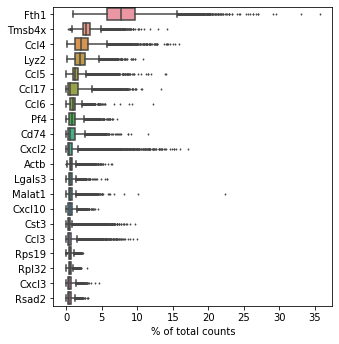

In [14]:
sc.pl.highest_expr_genes(adata, n_top=20, )

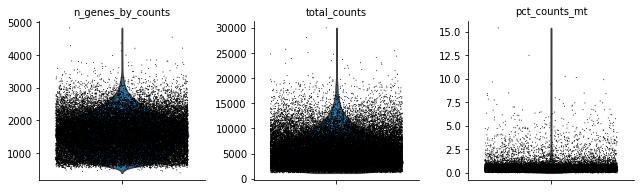

In [15]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

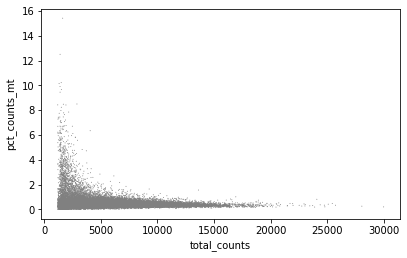

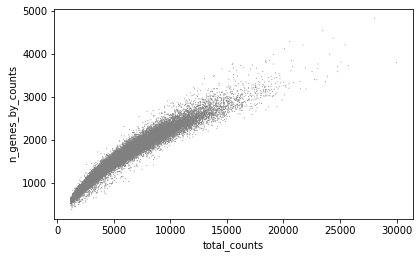

In [16]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

In [17]:
adata = adata[adata.obs.n_genes_by_counts < 3000, :]
adata = adata[adata.obs.pct_counts_mt < 2, :]

In [18]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

/ahg/regevdata/users/oursu/software/anaconda3/lib/python3.6/site-packages/scanpy/preprocessing/_normalization.py:138: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [19]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)


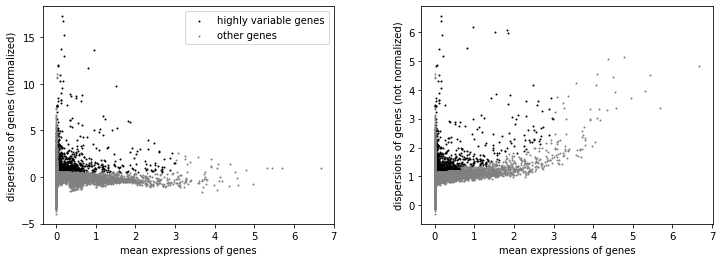

In [20]:
sc.pl.highly_variable_genes(adata)

In [21]:
adata.raw = adata

In [27]:
#for this example, we will restrict to variable genes so that it runs faster
adata=adata[:,adata.var['highly_variable']]
adata

View of AnnData object with n_obs × n_vars = 31744 × 1418 
    obs: 'batch', 'perturb.m_Rel_3', 'perturb.m_Spi1_3', 'perturb.m_Nfkb1_4', 'perturb.m_Irf4_4', 'perturb.m_Nfkb1_3', 'perturb.m_Irf4_2', 'perturb.m_Stat3_3', 'perturb.m_Irf2_1', 'perturb.m_E2f4_2', 'perturb.m_Stat1_1', 'perturb.m_Rel_1', 'perturb.m_Rela_2', 'perturb.m_Ets2_4', 'perturb.m_Stat1_3', 'perturb.m_Runx1_2', 'perturb.m_Irf1_1', 'perturb.m_Maff_1', 'perturb.m_Irf4_3', 'perturb.m_Atf3_1', 'perturb.m_Egr2_4', 'perturb.m_Ctcf_2', 'perturb.m_Ahr_1', 'perturb.m_Nfkb1_2', 'perturb.m_E2f1_4', 'perturb.m_Hif1a_4', 'perturb.m_Hif1a_1', 'perturb.m_Maff_4', 'perturb.m_Rel_2', 'perturb.m_Rela_3', 'perturb.m_Ets2_3', 'perturb.m_Cebpb_3', 'perturb.m_Irf1_2', 'perturb.m_E2f1_3', 'perturb.m_Stat2_4', 'perturb.m_Runx1_4', 'perturb.m_Spi1_4', 'perturb.m_Spi1_2', 'perturb.m_Stat2_2', 'perturb.m_Ctcf_1', 'perturb.m_Irf1_4', 'perturb.m_Junb_4', 'perturb.m_Irf2_3', 'perturb.m_Ahr_3', 'perturb.m_Rela_1', 'perturb.m_Irf2_4', 'perturb.m_Relb

In [28]:
#regress out the batch effects
to_regress=['total_counts', 'pct_counts_mt']
for batch in set(adata.obs['batch']):
    to_regress.append(batch)
    adata.obs[batch]=1.0*(adata.obs['batch']==batch)
print(to_regress)

Trying to set attribute `.obs` of view, copying.


['total_counts', 'pct_counts_mt', 'C9', 'D8', 'D9', 'C8', 'B8', 'B9', 'A8', 'A9']


In [29]:
sc.pp.regress_out(adata, to_regress)

In [30]:
sc.pp.scale(adata, max_value=10)

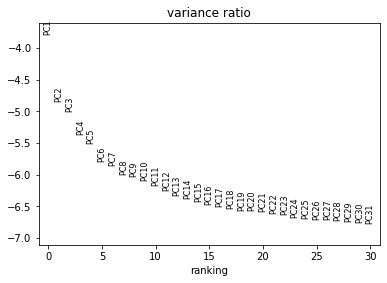

In [31]:
sc.tl.pca(adata, svd_solver='arpack')
sc.pl.pca_variance_ratio(adata, log=True)

In [32]:
sc.pp.neighbors(adata, n_neighbors=15, n_pcs=40)

In [33]:
sc.tl.umap(adata)

In [34]:
sc.tl.louvain(adata)

In [35]:
adata.write(pref+'.perturb.analysis.h5ad')

In [4]:
adata=sc.read(pref+'.perturb.analysis.h5ad')

Only considering the two last: ['.analysis', '.h5ad'].
Only considering the two last: ['.analysis', '.h5ad'].


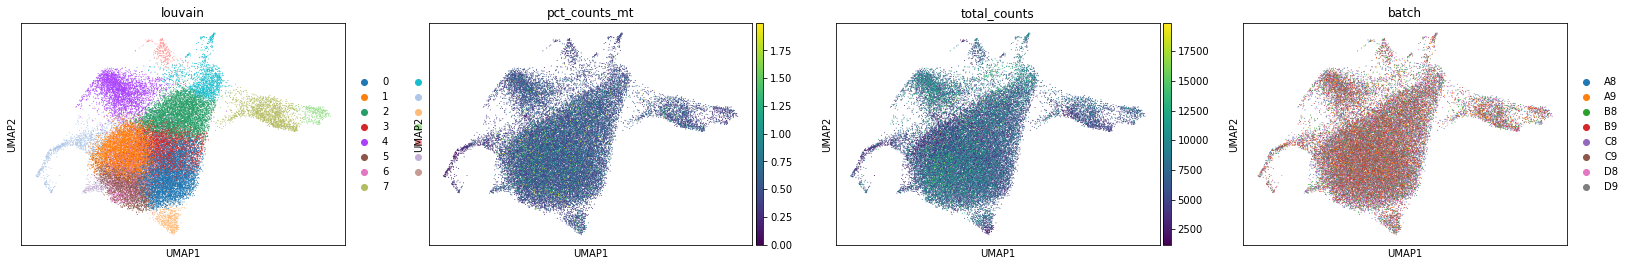

In [9]:
sc.pl.umap(adata,color=['louvain','pct_counts_mt','total_counts','batch'])

In [6]:
adata

AnnData object with n_obs × n_vars = 31744 × 1418 
    obs: 'batch', 'perturb.m_Rel_3', 'perturb.m_Spi1_3', 'perturb.m_Nfkb1_4', 'perturb.m_Irf4_4', 'perturb.m_Nfkb1_3', 'perturb.m_Irf4_2', 'perturb.m_Stat3_3', 'perturb.m_Irf2_1', 'perturb.m_E2f4_2', 'perturb.m_Stat1_1', 'perturb.m_Rel_1', 'perturb.m_Rela_2', 'perturb.m_Ets2_4', 'perturb.m_Stat1_3', 'perturb.m_Runx1_2', 'perturb.m_Irf1_1', 'perturb.m_Maff_1', 'perturb.m_Irf4_3', 'perturb.m_Atf3_1', 'perturb.m_Egr2_4', 'perturb.m_Ctcf_2', 'perturb.m_Ahr_1', 'perturb.m_Nfkb1_2', 'perturb.m_E2f1_4', 'perturb.m_Hif1a_4', 'perturb.m_Hif1a_1', 'perturb.m_Maff_4', 'perturb.m_Rel_2', 'perturb.m_Rela_3', 'perturb.m_Ets2_3', 'perturb.m_Cebpb_3', 'perturb.m_Irf1_2', 'perturb.m_E2f1_3', 'perturb.m_Stat2_4', 'perturb.m_Runx1_4', 'perturb.m_Spi1_4', 'perturb.m_Spi1_2', 'perturb.m_Stat2_2', 'perturb.m_Ctcf_1', 'perturb.m_Irf1_4', 'perturb.m_Junb_4', 'perturb.m_Irf2_3', 'perturb.m_Ahr_3', 'perturb.m_Rela_1', 'perturb.m_Irf2_4', 'perturb.m_Relb_1', 'pe

In [10]:
for v in ['perturb.m_Rel_3', 'perturb.m_Spi1_3', 'perturb.m_Nfkb1_4', 'perturb.m_Irf4_4', 'perturb.m_Nfkb1_3', 'perturb.m_Irf4_2', 'perturb.m_Stat3_3', 'perturb.m_Irf2_1', 'perturb.m_E2f4_2', 'perturb.m_Stat1_1', 'perturb.m_Rel_1', 'perturb.m_Rela_2', 'perturb.m_Ets2_4', 'perturb.m_Stat1_3', 'perturb.m_Runx1_2', 'perturb.m_Irf1_1', 'perturb.m_Maff_1', 'perturb.m_Irf4_3', 'perturb.m_Atf3_1', 'perturb.m_Egr2_4', 'perturb.m_Ctcf_2', 'perturb.m_Ahr_1', 'perturb.m_Nfkb1_2', 'perturb.m_E2f1_4', 'perturb.m_Hif1a_4', 'perturb.m_Hif1a_1', 'perturb.m_Maff_4', 'perturb.m_Rel_2', 'perturb.m_Rela_3', 'perturb.m_Ets2_3', 'perturb.m_Cebpb_3', 'perturb.m_Irf1_2', 'perturb.m_E2f1_3', 'perturb.m_Stat2_4', 'perturb.m_Runx1_4', 'perturb.m_Spi1_4', 'perturb.m_Spi1_2', 'perturb.m_Stat2_2', 'perturb.m_Ctcf_1', 'perturb.m_Irf1_4', 'perturb.m_Junb_4', 'perturb.m_Irf2_3', 'perturb.m_Ahr_3', 'perturb.m_Rela_1', 'perturb.m_Irf2_4', 'perturb.m_Relb_1', 'perturb.m_Egr1_4', 'perturb.m_Cebpb_1', 'perturb.m_E2f4_4', 'perturb.m_Atf3_2', 'perturb.m_Irf2_2', 'perturb.m_Stat2_3', 'perturb.m_Stat1_2', 'perturb.m_MouseNTC_100_A_67005', 'perturb.m_Hif1a_3', 'perturb.m_Egr2_2', 'perturb.m_E2f4_3', 'perturb.gene.E2f1', 'perturb.gene.Stat1', 'perturb.gene.Spi1', 'perturb.gene.Ctcf', 'perturb.gene.Egr2', 'perturb.gene.Hif1a', 'perturb.gene.Rela', 'perturb.gene.Cebpb', 'perturb.gene.Irf2', 'perturb.gene.Runx1', 'perturb.gene.Nfkb1', 'perturb.gene.Stat2', 'perturb.gene.MouseNTC', 'perturb.gene.Ets2', 'perturb.gene.Stat3', 'perturb.gene.Maff', 'perturb.gene.Atf3', 'perturb.gene.Irf4', 'perturb.gene.Rel', 'perturb.gene.Ahr', 'perturb.gene.Irf1', 'perturb.gene.E2f4', 'perturb.gene.Relb', 'perturb.gene.Junb', 'perturb.gene.Egr1', 'guide', 'guide.compact', 'gene', 'gene.compact', 'unassigned', 'control']:
    del adata.obs[v]

In [11]:
adata.write(pref+'.perturb.analysis.h5ad')